In [53]:
import seaborn as sns
import numpy as np
from tqdm.notebook import tqdm
import itertools
import operator
from tensorflow.keras.models import load_model
from scipy import stats
import tensorflow as tf
import math
import itertools
import operator
from tensorflow.python.keras import backend as k
from tqdm import tqdm, tqdm_notebook, notebook
import numpy as np
from tensorflow.keras import layers
import os
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import random
from random import choice
import re

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle

from sklearn.preprocessing import LabelEncoder
from bio import AlignIO
# from Bio.Align import MultipleSeqAlignment
# from Bio.SeqRecord import SeqRecord
# from Bio import SeqIO
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from keras_preprocessing import sequence
import sklearn
import numpy as np
import re
import pickle
import itertools
import random
import string
from joblib import dump, load

sns.set()

mut_dict = np.load('mut_dict_insert2.npy',allow_pickle=True).item()
inv_dict = {v: k for k, v in mut_dict.items()}
print(inv_dict)

ancName = '_HPGPNRMPC'
desName = 'hg38'



nonGene = [str(np.load('prepData/decoded_nonGene.npy'))[:7400000]]
positive = [str(np.load('prepData/decoded_+.npy'))[:7400000]]
negative = [str(np.load('prepData/decoded_-.npy'))[:7400000]]
inputAllpop = [str(np.load('prepData/insert2Anc_{}_{}_gene+_chr2.npy'.format(ancName, desName)))[:7400000]]
inputAllneg = [str(np.load('prepData/insert2Anc_{}_{}_gene-_chr2.npy'.format(ancName, desName)))[:7400000]]
inputAllnon = [str(np.load('prepData/insert2Anc_{}_{}_nonGene_chr2.npy'.format(ancName, desName)))[:7400000]]
def contextMut(size, ancNuc, desNuc, anc, des, positive, negative, nonGene = False):
    cont = list(itertools.product('ACGT', repeat=size))
    cont1 = list(itertools.product('ACGT', repeat=size))
    context_dict = {}
    count_dict = {}
    for i in cont1:
        for j in cont1:
            #context_dict[(''.join(i)+'A'+''.join(j) , ''.join(i)+'G'+''.join(j))] = 0
            context_dict[(''.join(i)+ancNuc+''.join(j))] = 0
            count_dict[(''.join(i)+ancNuc+''.join(j))] = 0
    for a,b in zip(anc, des):
        for i in range(len(a)-size*2):
            if a[i+size:i+size+len(ancNuc)] == ancNuc :
                count_dict[(a[i:i+size*2+len(ancNuc)])] += 1
    for a,b in zip(anc, des):
        for i in range(len(a)-size*2):
            if a[i+size:i+size+len(ancNuc)] == ancNuc and b[i+size+int(len(ancNuc)/2)] == desNuc:
                context_dict[(a[i:i+size*2+len(ancNuc)])] += 1
    for key in context_dict.keys():
        if count_dict[key] !=0:
            context_dict[key] = context_dict[key]/count_dict[key] 
        else :
            continue
    sorted_context = sorted(context_dict.items(), key=operator.itemgetter(1), reverse = 1)
    sorted_context = dict(sorted_context)
    if nonGene ==False:
        if positive == True and negative ==False:
            np.save('data/positive_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif positive == True and negative == True:
            np.save('data/positive_negative_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif positive == False and negative ==False:
            np.save('data/true_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif positive == False and negative ==True:
            np.save('data/true_negative_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        return sorted_context
    elif nonGene ==True :
        if positive == True:
            np.save('data/positive_nonGene_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif positive ==False:
            np.save('data/true_nonGene_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
    return sorted_context

def contextMutInsert(size, ancNuc, desNuc, anc, des, positive, negative, nonGene = False):
    cont1 = list(itertools.product('ACGT', repeat=size-1))
    cont = list(itertools.product('ACGT', repeat=size))
    context_dict = {}
    count_dict = {}
    for i in cont:
        for j in cont:
            #context_dict[(''.join(i)+'A'+''.join(j) , ''.join(i)+'G'+''.join(j))] = 0
            context_dict[(''.join(i)+ancNuc+''.join(j))] = 0
            count_dict[(''.join(i)+ancNuc+''.join(j))] = 0
    for a,b in zip(anc, des):
        for i in range(len(a)-size*2-len(ancNuc)+1):
            count_dict[(a[i:i+size]+ancNuc+a[i+size+len(ancNuc):i+size*2+len(ancNuc)])] += 1
    for a,b in zip(anc, des):
        for i in range(len(a)-size*2-len(ancNuc)+1):
            inserted_nuc = inv_dict[b[i+size+int(len(ancNuc)/2)-1]]
            if len(inserted_nuc) >1 and inserted_nuc[1] == desNuc:
                context_dict[(a[i:i+size]+ancNuc+a[i+size+len(ancNuc):i+size*2+len(ancNuc)])] += 1
    for key in context_dict.keys():
        if count_dict[key] !=0:
            context_dict[key] = context_dict[key]/count_dict[key] 
        else :
            continue
    sorted_context = sorted(context_dict.items(), key=operator.itemgetter(1), reverse = 1)
    sorted_context = dict(sorted_context)
    if nonGene ==False:
        if positive == True and negative ==False:
            np.save('data/positive_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif positive == True and negative == True:
            np.save('data/positive_negative_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif positive == False and negative ==False:
            np.save('data/true_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif positive == False and negative ==True:
            np.save('data/true_negative_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        return sorted_context
    elif nonGene ==True :
        if positive == True:
            np.save('data/positive_nonGene_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif positive ==False:
            np.save('data/true_nonGene_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
    return sorted_context

# def contextMutInsert(size, ancNuc, desNuc, anc, des, positive, negative, nonGene = False):
#     cont1 = list(itertools.product('ACGT', repeat=size-1))
#     cont = list(itertools.product('ACGT', repeat=size))
#     context_dict = {}
#     count_dict = {}
#     for i in cont:
#         for j in cont:
#             #context_dict[(''.join(i)+'A'+''.join(j) , ''.join(i)+'G'+''.join(j))] = 0
#             context_dict[(''.join(i)+ancNuc+''.join(j))] = 0
#             count_dict[(''.join(i)+ancNuc+''.join(j))] = 0
#     for a,b in zip(anc, des):
#         for i in range(len(a)-size*2-len(ancNuc)):
#             count_dict[(a[i:i+size]+ancNuc+a[i+size+len(ancNuc):i+size*2+len(ancNuc)])] += 1
#     for a,b in zip(anc, des):
#         for i in range(len(a)-size*2-len(ancNuc)):
#             inserted_nuc = inv_dict[b[i+size+int(len(ancNuc)/2)-1]]
#             if len(inserted_nuc) >1 and inserted_nuc[1] == desNuc:
#                 context_dict[(a[i:i+size]+ancNuc+a[i+size+len(ancNuc):i+size*2+len(ancNuc)])] += 1
#     for key in context_dict.keys():
#         if count_dict[key] !=0:
#             context_dict[key] = context_dict[key]/count_dict[key] 
#         else :
#             continue
#     sorted_context = sorted(context_dict.items(), key=operator.itemgetter(1), reverse = 1)
#     sorted_context = dict(sorted_context)
#     if nonGene ==False:
#         if positive == True and negative ==False:
#             np.save('data/positive{}_context{}->{}_{}_{}.npy'.format(table,ancNuc,desNuc,ancName,tableCon), sorted_context)
#         elif positive == True and negative == True:
#             np.save('data/positive{}_negative_context{}->{}_{}_{}.npy'.format(table,ancNuc,desNuc,ancName,tableCon), sorted_context)
#         elif positive == False and negative ==False:
#             np.save('data/true_context{}->{}_{}_{}.npy'.format(ancNuc,desNuc,ancName,tableCon), sorted_context)
#         elif positive == False and negative ==True:
#             np.save('data/true_negative_context{}->{}_{}_{}.npy'.format(ancNuc,desNuc,ancName,tableCon), sorted_context)
#         return sorted_context
#     elif nonGene ==True :
#         if positive == True:
#             np.save('data/positive_nonGene_context{}->{}_{}_{}.npy'.format(ancNuc,desNuc,ancName,tableCon), sorted_context)
#         elif positive ==False:
#             np.save('data/true_nonGene_context{}->{}_{}_{}.npy'.format(ancNuc,desNuc,ancName,tableCon), sorted_context)
#     return sorted_context
            
def plotScatter(n_groups, ancNuc, desNuc):
    positiveSeq = np.load('data/positive_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()

    negativeSeq = np.load('data/positive_negative_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()
    
    nonGeneSeq = np.load('data/true_nonGene_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()
#     print(positiveSeq)
    pos = list(positiveSeq.values())
    pos_context = list(positiveSeq.keys())
    negative = []
    nonGene = []
    for i in pos_context:
        nonGene.append(nonGeneSeq[i])
        negative.append(negativeSeq[i])
    f, (ax1, ax3) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,7))
    f.text(0.5, 0.15, 'positive', ha='center', va='center')
    f.text(0.05, 0.5, 'nonGene', ha='center', va='center', rotation='vertical')
    ax1.scatter(pos, nonGene, color = 'm')
    ax1.set_xlim([0, 1.2 * max(max(pos), max(nonGene))])
    ax1.set_ylim([0, 1.2 * max(max(pos), max(nonGene))])
    ax1.text(0.5,1, "r = {}".format(stats.pearsonr(pos, nonGene)[0]), size=15, ha="center", 
                         transform=ax1.transAxes)

    ax1.axis('scaled')
    ax1.axis('square')
    ax1.set_title('{} to {} nonGene vs +'.format(ancNuc, desNuc), fontsize = 16, y=1.08)
    for i, txt in enumerate(list(positiveSeq.keys())):
        if i%20 == 0:
            ax1.annotate(txt, (pos[i], nonGene[i]))
    ax1.legend()
    
    ax3.scatter(pos, negative, color = 'c')
    for i, txt in enumerate(list(positiveSeq.keys())):
        if i%20 == 0:
            ax3.annotate(txt, (pos[i], negative[i]))

    ax3.axis('scaled')
    ax3.axis('square')
    ax3.set_xlim([0, 1.2 * max(max(pos), max(negative))])
    ax3.set_ylim([0, 1.2 * max(max(pos), max(negative))])
    ax3.text(0.5,1, "r = {}".format(stats.pearsonr(pos, negative)[0]), size=15, ha="center", 
                         transform=ax3.transAxes)
#     ax3.legend()
    ax3.set_title('{} to {} - vs +'.format(ancNuc, desNuc), y = 1.08, fontsize = 16)
    f.savefig('figures/scatter_gene_{}_{}_{}->{}.png'.format(ancName, desName,  ancNuc, desNuc))
    f.show()
    plt.show()
    plt.close()
#     print(stats.pearsonr(positive, true), stats.pearsonr(nonGene, true))

{'A': 'A', 'C': 'C', 'G': 'G', 'T': 'T', '-': '-', '0': '0', '^': 'AAA', 'f': 'AAC', '4': 'AAT', 'B': 'AAG', 'w': 'ACA', 't': 'ACC', 'i': 'ACT', 'e': 'ACG', '.': 'ATA', 'c': 'ATC', '>': 'ATT', 'X': 'ATG', '5': 'AGA', '|': 'AGC', '[': 'AGT', 's': 'AGG', 'u': 'CAA', '(': 'CAC', '=': 'CAT', 'q': 'CAG', 'W': 'CCA', '_': 'CCC', '!': 'CCT', '{': 'CCG', '1': 'CTA', 'Q': 'CTC', 'U': 'CTT', 'b': 'CTG', 'M': 'CGA', ';': 'CGC', 'm': 'CGT', '~': 'CGG', 'a': 'TAA', ']': 'TAC', '&': 'TAT', ')': 'TAG', '7': 'TCA', '6': 'TCC', 'p': 'TCT', '%': 'TCG', 'n': 'TTA', 'P': 'TTC', 'F': 'TTT', 'h': 'TTG', '3': 'TGA', ':': 'TGC', 'z': 'TGT', '8': 'TGG', 'R': 'GAA', 'S': 'GAC', '/': 'GAT', 'j': 'GAG', 'o': 'GCA', 'd': 'GCC', '@': 'GCT', 'L': 'GCG', '}': 'GTA', 'H': 'GTC', 'Y': 'GTT', 'x': 'GTG', '"': 'GGA', 'I': 'GGC', '\\': 'GGT', 'J': 'GGG', '9': 'AA', '`': 'AC', 'l': 'AT', '<': 'AG', 'N': 'CA', 'V': 'CC', 'D': 'CT', '+': 'CG', 'E': 'TA', 'Z': 'TC', '$': 'TT', '?': 'TG', '2': 'GA', 'K': 'GC', '*': 'GT', 'g': 

In [54]:
contextLen = 2
# ancCase = ['A','C','G','T']
# desCase = ['A','C','G','T','-']
# for i in tqdm(ancCase):
#     for j in desCase:
#         contextMut(contextLen, i, j, inputAllpop, positive, positive = True, negative = False, nonGene = False)
#         contextMut(contextLen, i, j, inputAllneg, negative, positive = True, negative = True, nonGene = False)
#         contextMut(contextLen, i, j, inputAllnon, nonGene, positive = False, negative = False, nonGene = True)
ancCase = ['-']
desCase = ['A','C','G','T','-']
for i in tqdm(ancCase):
    for j in desCase:
        contextMutInsert(contextLen, i, j, inputAllpop, positive, positive = True, negative = False, nonGene = False)
        contextMutInsert(contextLen, i, j, inputAllneg, negative, positive = True, negative = True, nonGene = False)
        contextMutInsert(contextLen, i, j, inputAllnon, nonGene, positive = False, negative = False, nonGene = True)





  0%|          | 0/1 [00:07<?, ?it/s]


NameError: name 'table' is not defined

No handles with labels found to put in legend.


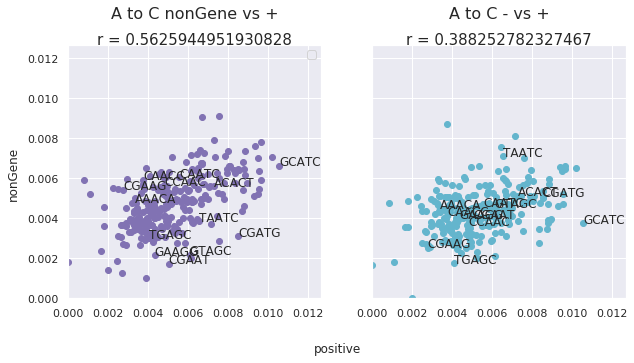

No handles with labels found to put in legend.


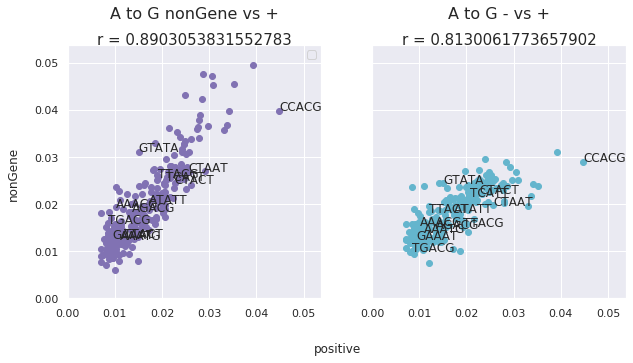

No handles with labels found to put in legend.


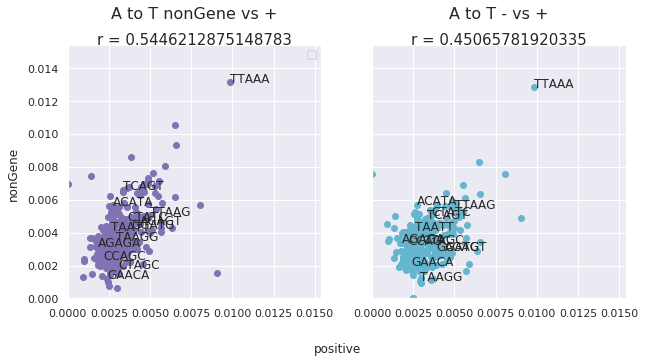

No handles with labels found to put in legend.


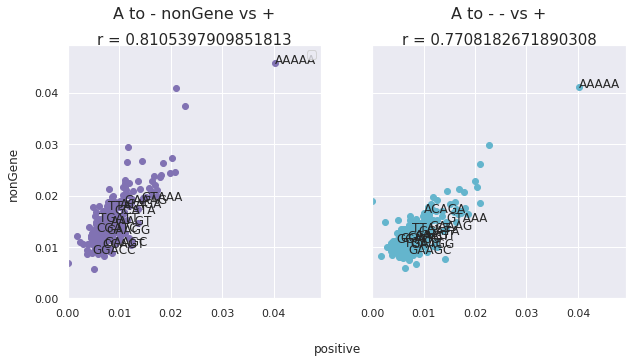

No handles with labels found to put in legend.


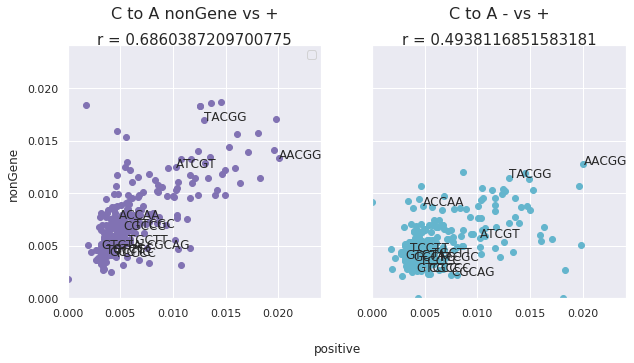

No handles with labels found to put in legend.


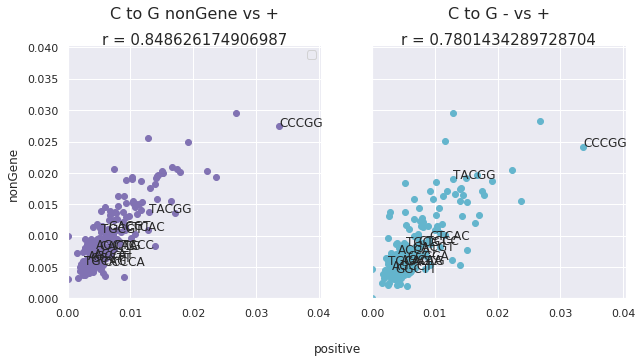

No handles with labels found to put in legend.


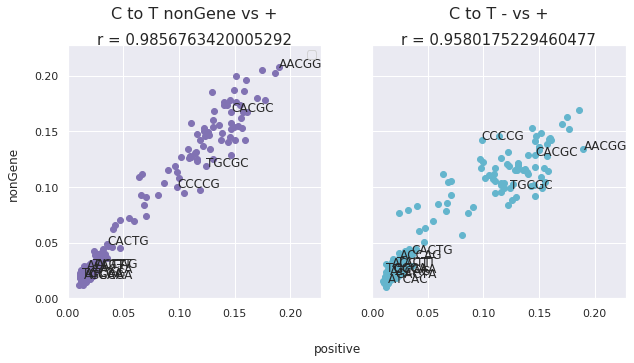

No handles with labels found to put in legend.


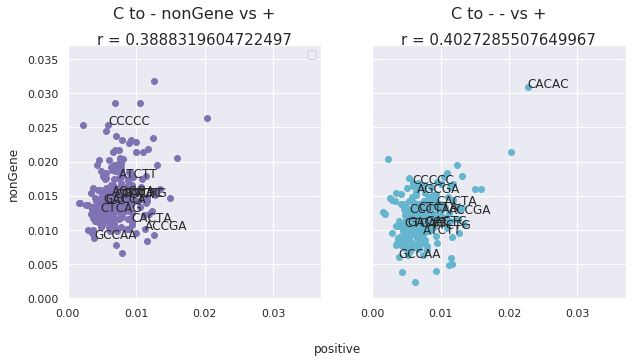

No handles with labels found to put in legend.


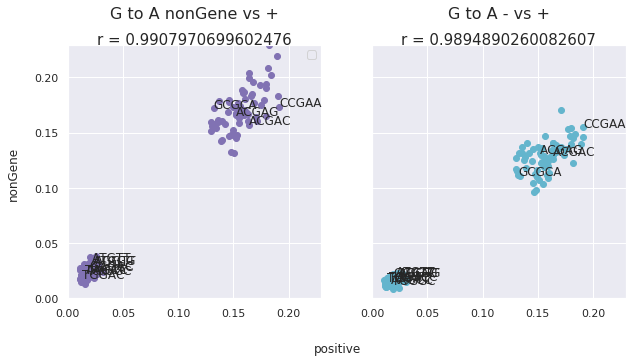

No handles with labels found to put in legend.


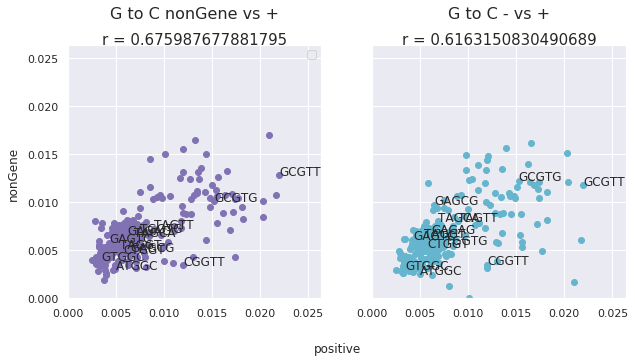

No handles with labels found to put in legend.


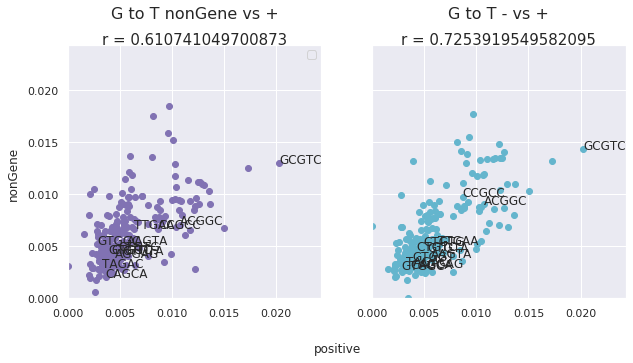

No handles with labels found to put in legend.


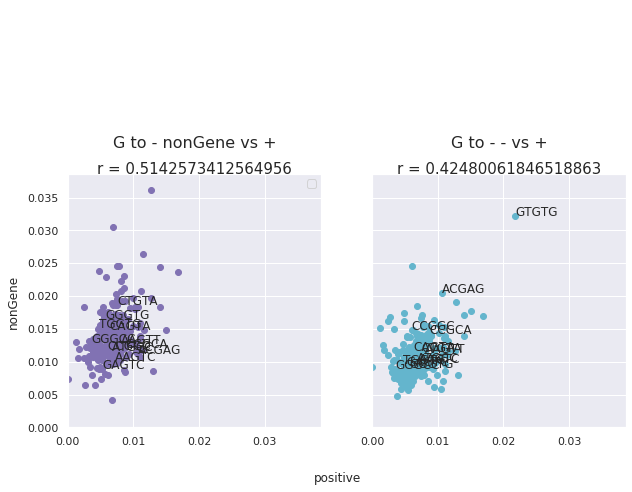

No handles with labels found to put in legend.


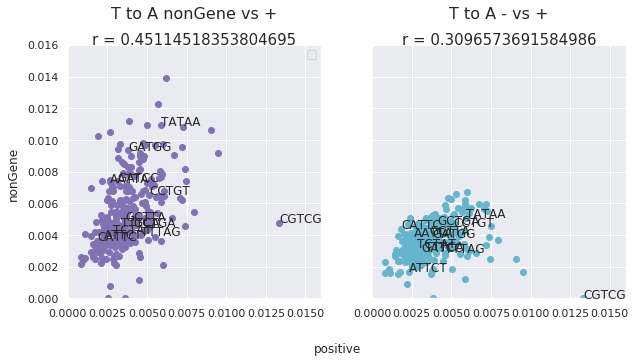

No handles with labels found to put in legend.


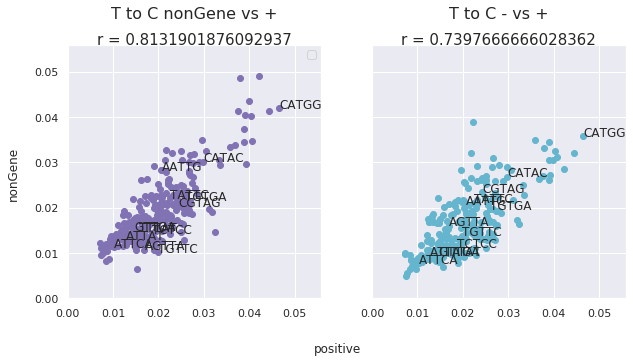

No handles with labels found to put in legend.


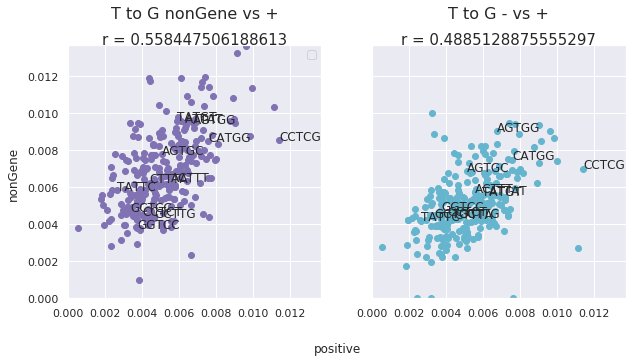

No handles with labels found to put in legend.


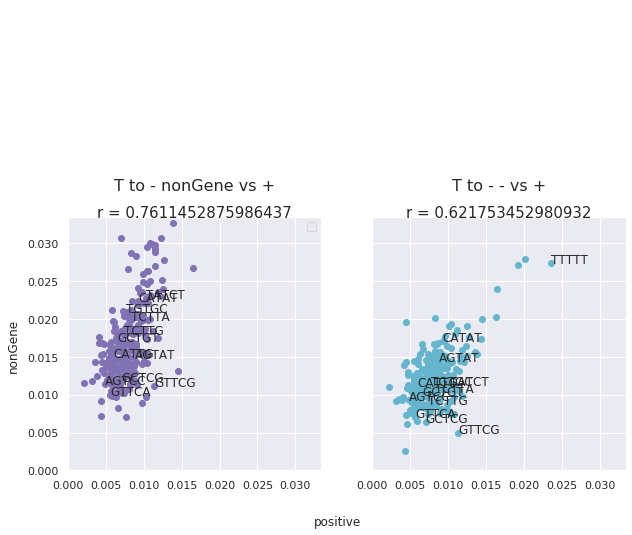

No handles with labels found to put in legend.


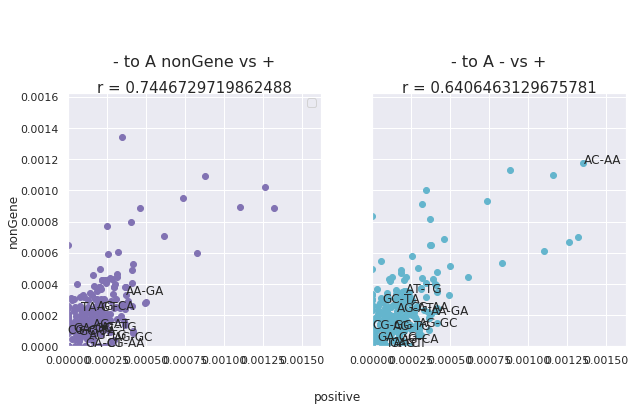

No handles with labels found to put in legend.


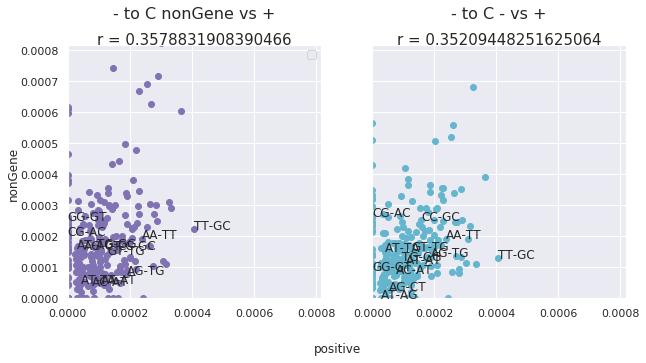

No handles with labels found to put in legend.


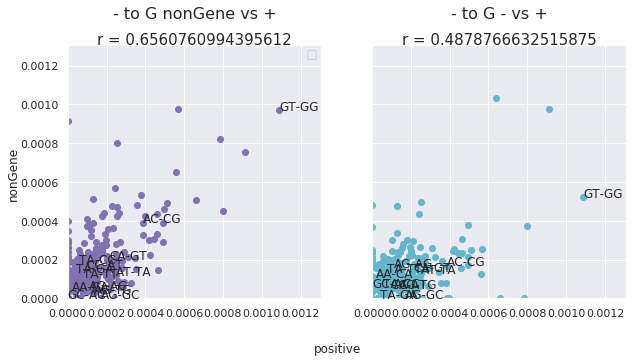

No handles with labels found to put in legend.


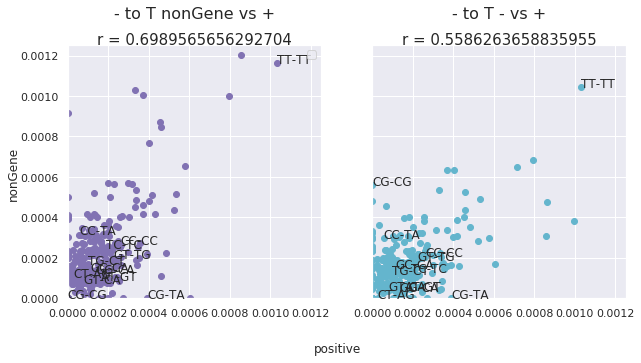

In [46]:
ancCase = ['A','C','G','T', '-']
desCase = ['A','C','G','T','-']
for i in ancCase:
    for j in desCase:
        if i != j:
            plotScatter(10,i, j)

In [55]:
from IPython.display import display
import pandas as pd
import collections
pd.options.display.float_format = '{:,.2f}'.format
def analyzeMut(ancNuc, desNuc):
    positiveSeq = np.load('data/positive_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()

    negativeSeq = np.load('data/positive_negative_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()
    
    nonGeneSeq = np.load('data/true_nonGene_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()
    return positiveSeq, negativeSeq, nonGeneSeq

ancNuc = ['A', 'C', 'G', 'T', '-']
desNuc = ['A', 'C', 'G', 'T', '-']    

for i in ancNuc:
    for j in desNuc:
        if i != j :
            print('=========================================================================================================')
            pos, neg, non = analyzeMut(i,j)
            pos = collections.OrderedDict(sorted(pos.items()))
            neg = collections.OrderedDict(sorted(neg.items()))
            non = collections.OrderedDict(sorted(non.items()))
            print('Context of {} -> {}'.format(i,j))
            for a, b, c, d, e, f in zip(pos.keys(), pos.values(), neg.keys(), neg.values(), non.keys(), non.values()):
                print('+: ', a,'{:,.5f}'.format(b), '-:', c, '{:,.5f}'.format(d), 'nonGene: ',e,'{:,.5f}'.format(f), '\\', '\\' )
            print('=========================================================================================================')
            print()
            print()

Context of A -> C
+:  AAAAA 0.00492 -: AAAAA 0.00659 nonGene:  AAAAA 0.00510 \ \
+:  AAAAC 0.00390 -: AAAAC 0.00431 nonGene:  AAAAC 0.00392 \ \
+:  AAAAG 0.00392 -: AAAAG 0.00461 nonGene:  AAAAG 0.00329 \ \
+:  AAAAT 0.00340 -: AAAAT 0.00510 nonGene:  AAAAT 0.00440 \ \
+:  AAACA 0.00338 -: AAACA 0.00452 nonGene:  AAACA 0.00481 \ \
+:  AAACC 0.00514 -: AAACC 0.00406 nonGene:  AAACC 0.00407 \ \
+:  AAACG 0.00179 -: AAACG 0.00357 nonGene:  AAACG 0.00360 \ \
+:  AAACT 0.00269 -: AAACT 0.00437 nonGene:  AAACT 0.00368 \ \
+:  AAAGA 0.00327 -: AAAGA 0.00477 nonGene:  AAAGA 0.00376 \ \
+:  AAAGC 0.00367 -: AAAGC 0.00508 nonGene:  AAAGC 0.00336 \ \
+:  AAAGG 0.00310 -: AAAGG 0.00489 nonGene:  AAAGG 0.00398 \ \
+:  AAAGT 0.00331 -: AAAGT 0.00467 nonGene:  AAAGT 0.00427 \ \
+:  AAATA 0.00334 -: AAATA 0.00514 nonGene:  AAATA 0.00438 \ \
+:  AAATC 0.00293 -: AAATC 0.00499 nonGene:  AAATC 0.00454 \ \
+:  AAATG 0.00315 -: AAATG 0.00424 nonGene:  AAATG 0.00334 \ \
+:  AAATT 0.00366 -: AAATT 0.00576 no

+:  TGACA 0.00646 -: TGACA 0.00332 nonGene:  TGACA 0.00397 \ \
+:  TGACC 0.00501 -: TGACC 0.00451 nonGene:  TGACC 0.00497 \ \
+:  TGACG 0.00000 -: TGACG 0.00167 nonGene:  TGACG 0.00184 \ \
+:  TGACT 0.00570 -: TGACT 0.00368 nonGene:  TGACT 0.00325 \ \
+:  TGAGA 0.00429 -: TGAGA 0.00323 nonGene:  TGAGA 0.00302 \ \
+:  TGAGC 0.00407 -: TGAGC 0.00177 nonGene:  TGAGC 0.00301 \ \
+:  TGAGG 0.00547 -: TGAGG 0.00459 nonGene:  TGAGG 0.00279 \ \
+:  TGAGT 0.00495 -: TGAGT 0.00316 nonGene:  TGAGT 0.00361 \ \
+:  TGATA 0.00479 -: TGATA 0.00507 nonGene:  TGATA 0.00411 \ \
+:  TGATC 0.00439 -: TGATC 0.00434 nonGene:  TGATC 0.00401 \ \
+:  TGATG 0.00473 -: TGATG 0.00425 nonGene:  TGATG 0.00347 \ \
+:  TGATT 0.00538 -: TGATT 0.00393 nonGene:  TGATT 0.00329 \ \
+:  TTAAA 0.00839 -: TTAAA 0.00475 nonGene:  TTAAA 0.00627 \ \
+:  TTAAC 0.00670 -: TTAAC 0.00424 nonGene:  TTAAC 0.00675 \ \
+:  TTAAG 0.00874 -: TTAAG 0.00348 nonGene:  TTAAG 0.00439 \ \
+:  TTAAT 0.00794 -: TTAAT 0.00491 nonGene:  TTAAT 0.00

+:  TGATC 0.01215 -: TGATC 0.01253 nonGene:  TGATC 0.01202 \ \
+:  TGATG 0.01126 -: TGATG 0.01179 nonGene:  TGATG 0.01568 \ \
+:  TGATT 0.01301 -: TGATT 0.01276 nonGene:  TGATT 0.01235 \ \
+:  TTAAA 0.01003 -: TTAAA 0.01174 nonGene:  TTAAA 0.00940 \ \
+:  TTAAC 0.01082 -: TTAAC 0.01179 nonGene:  TTAAC 0.00794 \ \
+:  TTAAG 0.01292 -: TTAAG 0.01244 nonGene:  TTAAG 0.00932 \ \
+:  TTAAT 0.01340 -: TTAAT 0.01599 nonGene:  TTAAT 0.01450 \ \
+:  TTACA 0.01121 -: TTACA 0.01329 nonGene:  TTACA 0.01159 \ \
+:  TTACC 0.01216 -: TTACC 0.01257 nonGene:  TTACC 0.01108 \ \
+:  TTACG 0.01921 -: TTACG 0.01521 nonGene:  TTACG 0.02566 \ \
+:  TTACT 0.01200 -: TTACT 0.01828 nonGene:  TTACT 0.01306 \ \
+:  TTAGA 0.01223 -: TTAGA 0.01603 nonGene:  TTAGA 0.01302 \ \
+:  TTAGC 0.01527 -: TTAGC 0.01241 nonGene:  TTAGC 0.01670 \ \
+:  TTAGG 0.01387 -: TTAGG 0.01522 nonGene:  TTAGG 0.01693 \ \
+:  TTAGT 0.01695 -: TTAGT 0.01878 nonGene:  TTAGT 0.01979 \ \
+:  TTATA 0.01433 -: TTATA 0.01422 nonGene:  TTATA 0.01

+:  TTATC 0.00576 -: TTATC 0.00444 nonGene:  TTATC 0.00580 \ \
+:  TTATG 0.00530 -: TTATG 0.00497 nonGene:  TTATG 0.00639 \ \
+:  TTATT 0.00649 -: TTATT 0.00829 nonGene:  TTATT 0.01051 \ \


Context of A -> -
+:  AAAAA 0.04023 -: AAAAA 0.04108 nonGene:  AAAAA 0.04566 \ \
+:  AAAAC 0.01735 -: AAAAC 0.01657 nonGene:  AAAAC 0.01995 \ \
+:  AAAAG 0.01726 -: AAAAG 0.01700 nonGene:  AAAAG 0.02117 \ \
+:  AAAAT 0.01192 -: AAAAT 0.01520 nonGene:  AAAAT 0.01795 \ \
+:  AAACA 0.01612 -: AAACA 0.01868 nonGene:  AAACA 0.02096 \ \
+:  AAACC 0.01237 -: AAACC 0.01119 nonGene:  AAACC 0.01030 \ \
+:  AAACG 0.01193 -: AAACG 0.01013 nonGene:  AAACG 0.01169 \ \
+:  AAACT 0.00830 -: AAACT 0.01144 nonGene:  AAACT 0.01384 \ \
+:  AAAGA 0.01814 -: AAAGA 0.01749 nonGene:  AAAGA 0.02396 \ \
+:  AAAGC 0.01023 -: AAAGC 0.01120 nonGene:  AAAGC 0.01208 \ \
+:  AAAGG 0.00833 -: AAAGG 0.01101 nonGene:  AAAGG 0.01529 \ \
+:  AAAGT 0.00839 -: AAAGT 0.01169 nonGene:  AAAGT 0.01439 \ \
+:  AAATA 0.01523 -: AAATA 0.01835 

+:  TCACT 0.00631 -: TCACT 0.01288 nonGene:  TCACT 0.01224 \ \
+:  TCAGA 0.00752 -: TCAGA 0.01241 nonGene:  TCAGA 0.01447 \ \
+:  TCAGC 0.00449 -: TCAGC 0.01118 nonGene:  TCAGC 0.01183 \ \
+:  TCAGG 0.00498 -: TCAGG 0.01008 nonGene:  TCAGG 0.01216 \ \
+:  TCAGT 0.00751 -: TCAGT 0.01089 nonGene:  TCAGT 0.01508 \ \
+:  TCATA 0.00763 -: TCATA 0.01266 nonGene:  TCATA 0.01376 \ \
+:  TCATC 0.00824 -: TCATC 0.01079 nonGene:  TCATC 0.01402 \ \
+:  TCATG 0.00612 -: TCATG 0.01137 nonGene:  TCATG 0.01192 \ \
+:  TCATT 0.00780 -: TCATT 0.01180 nonGene:  TCATT 0.01592 \ \
+:  TGAAA 0.01103 -: TGAAA 0.01256 nonGene:  TGAAA 0.01684 \ \
+:  TGAAC 0.00459 -: TGAAC 0.00965 nonGene:  TGAAC 0.01220 \ \
+:  TGAAG 0.00675 -: TGAAG 0.00996 nonGene:  TGAAG 0.01336 \ \
+:  TGAAT 0.00626 -: TGAAT 0.01117 nonGene:  TGAAT 0.01307 \ \
+:  TGACA 0.00589 -: TGACA 0.01197 nonGene:  TGACA 0.01276 \ \
+:  TGACC 0.00685 -: TGACC 0.00918 nonGene:  TGACC 0.01346 \ \
+:  TGACG 0.00663 -: TGACG 0.01002 nonGene:  TGACG 0.01

+:  TCCCC 0.00452 -: TCCCC 0.00320 nonGene:  TCCCC 0.00403 \ \
+:  TCCCG 0.00850 -: TCCCG 0.00495 nonGene:  TCCCG 0.00717 \ \
+:  TCCCT 0.00367 -: TCCCT 0.00266 nonGene:  TCCCT 0.00344 \ \
+:  TCCGA 0.00464 -: TCCGA 0.00484 nonGene:  TCCGA 0.00881 \ \
+:  TCCGC 0.00896 -: TCCGC 0.00847 nonGene:  TCCGC 0.01055 \ \
+:  TCCGG 0.01043 -: TCCGG 0.00648 nonGene:  TCCGG 0.00789 \ \
+:  TCCGT 0.00846 -: TCCGT 0.00590 nonGene:  TCCGT 0.01021 \ \
+:  TCCTA 0.00293 -: TCCTA 0.00445 nonGene:  TCCTA 0.00449 \ \
+:  TCCTC 0.00314 -: TCCTC 0.00502 nonGene:  TCCTC 0.00409 \ \
+:  TCCTG 0.00433 -: TCCTG 0.00625 nonGene:  TCCTG 0.00468 \ \
+:  TCCTT 0.00359 -: TCCTT 0.00449 nonGene:  TCCTT 0.00429 \ \
+:  TGCAA 0.00428 -: TGCAA 0.00638 nonGene:  TGCAA 0.00594 \ \
+:  TGCAC 0.00491 -: TGCAC 0.00438 nonGene:  TGCAC 0.00594 \ \
+:  TGCAG 0.00475 -: TGCAG 0.00636 nonGene:  TGCAG 0.00716 \ \
+:  TGCAT 0.00461 -: TGCAT 0.00543 nonGene:  TGCAT 0.00660 \ \
+:  TGCCA 0.00423 -: TGCCA 0.00473 nonGene:  TGCCA 0.00

+:  GTCTA 0.00437 -: GTCTA 0.00238 nonGene:  GTCTA 0.00809 \ \
+:  GTCTC 0.00403 -: GTCTC 0.00494 nonGene:  GTCTC 0.00721 \ \
+:  GTCTG 0.00495 -: GTCTG 0.00476 nonGene:  GTCTG 0.00909 \ \
+:  GTCTT 0.00623 -: GTCTT 0.00647 nonGene:  GTCTT 0.00742 \ \
+:  TACAA 0.00550 -: TACAA 0.00705 nonGene:  TACAA 0.00770 \ \
+:  TACAC 0.00503 -: TACAC 0.00757 nonGene:  TACAC 0.00971 \ \
+:  TACAG 0.00485 -: TACAG 0.00685 nonGene:  TACAG 0.00766 \ \
+:  TACAT 0.00371 -: TACAT 0.00556 nonGene:  TACAT 0.00730 \ \
+:  TACCA 0.00401 -: TACCA 0.00387 nonGene:  TACCA 0.00561 \ \
+:  TACCC 0.00566 -: TACCC 0.00528 nonGene:  TACCC 0.00699 \ \
+:  TACCG 0.00000 -: TACCG 0.00472 nonGene:  TACCG 0.00987 \ \
+:  TACCT 0.00567 -: TACCT 0.00572 nonGene:  TACCT 0.00686 \ \
+:  TACGA 0.00545 -: TACGA 0.01163 nonGene:  TACGA 0.01159 \ \
+:  TACGC 0.00906 -: TACGC 0.00951 nonGene:  TACGC 0.01144 \ \
+:  TACGG 0.01297 -: TACGG 0.01911 nonGene:  TACGG 0.01379 \ \
+:  TACGT 0.00666 -: TACGT 0.01264 nonGene:  TACGT 0.01

+:  TGCCA 0.01745 -: TGCCA 0.01955 nonGene:  TGCCA 0.01813 \ \
+:  TGCCC 0.01479 -: TGCCC 0.02026 nonGene:  TGCCC 0.02367 \ \
+:  TGCCG 0.04055 -: TGCCG 0.08321 nonGene:  TGCCG 0.06192 \ \
+:  TGCCT 0.01664 -: TGCCT 0.02124 nonGene:  TGCCT 0.01967 \ \
+:  TGCGA 0.10918 -: TGCGA 0.11147 nonGene:  TGCGA 0.12573 \ \
+:  TGCGC 0.12418 -: TGCGC 0.09915 nonGene:  TGCGC 0.11874 \ \
+:  TGCGG 0.13770 -: TGCGG 0.11661 nonGene:  TGCGG 0.14196 \ \
+:  TGCGT 0.11598 -: TGCGT 0.10163 nonGene:  TGCGT 0.12328 \ \
+:  TGCTA 0.01867 -: TGCTA 0.02104 nonGene:  TGCTA 0.02132 \ \
+:  TGCTC 0.02070 -: TGCTC 0.02656 nonGene:  TGCTC 0.02276 \ \
+:  TGCTG 0.02668 -: TGCTG 0.03076 nonGene:  TGCTG 0.02729 \ \
+:  TGCTT 0.02148 -: TGCTT 0.02397 nonGene:  TGCTT 0.02272 \ \
+:  TTCAA 0.01232 -: TTCAA 0.01592 nonGene:  TTCAA 0.01569 \ \
+:  TTCAC 0.01485 -: TTCAC 0.01737 nonGene:  TTCAC 0.01892 \ \
+:  TTCAG 0.01865 -: TTCAG 0.02322 nonGene:  TTCAG 0.02301 \ \
+:  TTCAT 0.01515 -: TTCAT 0.01606 nonGene:  TTCAT 0.02

+:  TCCCC 0.00707 -: TCCCC 0.01075 nonGene:  TCCCC 0.01886 \ \
+:  TCCCG 0.00500 -: TCCCG 0.01278 nonGene:  TCCCG 0.01076 \ \
+:  TCCCT 0.00536 -: TCCCT 0.00964 nonGene:  TCCCT 0.01774 \ \
+:  TCCGA 0.00348 -: TCCGA 0.01064 nonGene:  TCCGA 0.00962 \ \
+:  TCCGC 0.01119 -: TCCGC 0.00484 nonGene:  TCCGC 0.01213 \ \
+:  TCCGG 0.01137 -: TCCGG 0.01134 nonGene:  TCCGG 0.01396 \ \
+:  TCCGT 0.00423 -: TCCGT 0.01376 nonGene:  TCCGT 0.01945 \ \
+:  TCCTA 0.00528 -: TCCTA 0.01008 nonGene:  TCCTA 0.01172 \ \
+:  TCCTC 0.00629 -: TCCTC 0.01042 nonGene:  TCCTC 0.01922 \ \
+:  TCCTG 0.00497 -: TCCTG 0.00980 nonGene:  TCCTG 0.01305 \ \
+:  TCCTT 0.00555 -: TCCTT 0.00931 nonGene:  TCCTT 0.02450 \ \
+:  TGCAA 0.00657 -: TGCAA 0.00999 nonGene:  TGCAA 0.01364 \ \
+:  TGCAC 0.00651 -: TGCAC 0.01154 nonGene:  TGCAC 0.01573 \ \
+:  TGCAG 0.00423 -: TGCAG 0.01057 nonGene:  TGCAG 0.01447 \ \
+:  TGCAT 0.00933 -: TGCAT 0.00919 nonGene:  TGCAT 0.01630 \ \
+:  TGCCA 0.00672 -: TGCCA 0.00795 nonGene:  TGCCA 0.01

+:  CCGTT 0.01277 -: CCGTT 0.01101 nonGene:  CCGTT 0.01240 \ \
+:  CGGAA 0.00344 -: CGGAA 0.00624 nonGene:  CGGAA 0.00729 \ \
+:  CGGAC 0.00801 -: CGGAC 0.00126 nonGene:  CGGAC 0.00428 \ \
+:  CGGAG 0.00358 -: CGGAG 0.00357 nonGene:  CGGAG 0.00788 \ \
+:  CGGAT 0.00722 -: CGGAT 0.00617 nonGene:  CGGAT 0.00560 \ \
+:  CGGCA 0.00652 -: CGGCA 0.00601 nonGene:  CGGCA 0.00535 \ \
+:  CGGCC 0.00725 -: CGGCC 0.00585 nonGene:  CGGCC 0.00779 \ \
+:  CGGCG 0.00561 -: CGGCG 0.00799 nonGene:  CGGCG 0.00399 \ \
+:  CGGCT 0.00480 -: CGGCT 0.00345 nonGene:  CGGCT 0.00781 \ \
+:  CGGGA 0.00630 -: CGGGA 0.00434 nonGene:  CGGGA 0.00350 \ \
+:  CGGGC 0.00420 -: CGGGC 0.00569 nonGene:  CGGGC 0.00550 \ \
+:  CGGGG 0.00637 -: CGGGG 0.00410 nonGene:  CGGGG 0.00457 \ \
+:  CGGGT 0.00567 -: CGGGT 0.00314 nonGene:  CGGGT 0.00527 \ \
+:  CGGTA 0.01197 -: CGGTA 0.00314 nonGene:  CGGTA 0.00889 \ \
+:  CGGTC 0.00282 -: CGGTC 0.00498 nonGene:  CGGTC 0.00809 \ \
+:  CGGTG 0.00630 -: CGGTG 0.00925 nonGene:  CGGTG 0.00

+:  CAGTC 0.00366 -: CAGTC 0.00479 nonGene:  CAGTC 0.00412 \ \
+:  CAGTG 0.00314 -: CAGTG 0.00437 nonGene:  CAGTG 0.00434 \ \
+:  CAGTT 0.00314 -: CAGTT 0.00495 nonGene:  CAGTT 0.00512 \ \
+:  CCGAA 0.00641 -: CCGAA 0.00563 nonGene:  CCGAA 0.00969 \ \
+:  CCGAC 0.00712 -: CCGAC 0.01091 nonGene:  CCGAC 0.00984 \ \
+:  CCGAG 0.00886 -: CCGAG 0.00887 nonGene:  CCGAG 0.00846 \ \
+:  CCGAT 0.00579 -: CCGAT 0.00671 nonGene:  CCGAT 0.00973 \ \
+:  CCGCA 0.00584 -: CCGCA 0.00775 nonGene:  CCGCA 0.01216 \ \
+:  CCGCC 0.00868 -: CCGCC 0.00976 nonGene:  CCGCC 0.00670 \ \
+:  CCGCG 0.00592 -: CCGCG 0.00892 nonGene:  CCGCG 0.00972 \ \
+:  CCGCT 0.01216 -: CCGCT 0.00700 nonGene:  CCGCT 0.00845 \ \
+:  CCGGA 0.00540 -: CCGGA 0.00733 nonGene:  CCGGA 0.00713 \ \
+:  CCGGC 0.00656 -: CCGGC 0.00806 nonGene:  CCGGC 0.00740 \ \
+:  CCGGG 0.00774 -: CCGGG 0.00786 nonGene:  CCGGG 0.00892 \ \
+:  CCGGT 0.01099 -: CCGGT 0.01336 nonGene:  CCGGT 0.00801 \ \
+:  CCGTA 0.01010 -: CCGTA 0.00526 nonGene:  CCGTA 0.01

+:  CTGAA 0.00692 -: CTGAA 0.01104 nonGene:  CTGAA 0.01262 \ \
+:  CTGAC 0.00639 -: CTGAC 0.01069 nonGene:  CTGAC 0.01314 \ \
+:  CTGAG 0.00761 -: CTGAG 0.00955 nonGene:  CTGAG 0.01371 \ \
+:  CTGAT 0.00783 -: CTGAT 0.00935 nonGene:  CTGAT 0.01473 \ \
+:  CTGCA 0.00573 -: CTGCA 0.01051 nonGene:  CTGCA 0.01357 \ \
+:  CTGCC 0.00492 -: CTGCC 0.01000 nonGene:  CTGCC 0.01568 \ \
+:  CTGCG 0.00625 -: CTGCG 0.01479 nonGene:  CTGCG 0.01697 \ \
+:  CTGCT 0.00649 -: CTGCT 0.00781 nonGene:  CTGCT 0.01414 \ \
+:  CTGGA 0.00716 -: CTGGA 0.00925 nonGene:  CTGGA 0.01512 \ \
+:  CTGGC 0.00662 -: CTGGC 0.00925 nonGene:  CTGGC 0.01258 \ \
+:  CTGGG 0.00753 -: CTGGG 0.00987 nonGene:  CTGGG 0.01644 \ \
+:  CTGGT 0.00580 -: CTGGT 0.01046 nonGene:  CTGGT 0.01492 \ \
+:  CTGTA 0.00758 -: CTGTA 0.01152 nonGene:  CTGTA 0.01868 \ \
+:  CTGTC 0.00721 -: CTGTC 0.01378 nonGene:  CTGTC 0.01725 \ \
+:  CTGTG 0.00730 -: CTGTG 0.01264 nonGene:  CTGTG 0.01861 \ \
+:  CTGTT 0.00815 -: CTGTT 0.01007 nonGene:  CTGTT 0.02

+:  CCTAA 0.00609 -: CCTAA 0.00296 nonGene:  CCTAA 0.00646 \ \
+:  CCTAC 0.00377 -: CCTAC 0.00519 nonGene:  CCTAC 0.00832 \ \
+:  CCTAG 0.00424 -: CCTAG 0.00505 nonGene:  CCTAG 0.00638 \ \
+:  CCTAT 0.00534 -: CCTAT 0.00350 nonGene:  CCTAT 0.00708 \ \
+:  CCTCA 0.00349 -: CCTCA 0.00443 nonGene:  CCTCA 0.00371 \ \
+:  CCTCC 0.00369 -: CCTCC 0.00471 nonGene:  CCTCC 0.00477 \ \
+:  CCTCG 0.00794 -: CCTCG 0.00372 nonGene:  CCTCG 0.00548 \ \
+:  CCTCT 0.00351 -: CCTCT 0.00296 nonGene:  CCTCT 0.00422 \ \
+:  CCTGA 0.00588 -: CCTGA 0.00594 nonGene:  CCTGA 0.00790 \ \
+:  CCTGC 0.00518 -: CCTGC 0.00410 nonGene:  CCTGC 0.00521 \ \
+:  CCTGG 0.00671 -: CCTGG 0.00593 nonGene:  CCTGG 0.00903 \ \
+:  CCTGT 0.00515 -: CCTGT 0.00453 nonGene:  CCTGT 0.00654 \ \
+:  CCTTA 0.00505 -: CCTTA 0.00320 nonGene:  CCTTA 0.00369 \ \
+:  CCTTC 0.00495 -: CCTTC 0.00386 nonGene:  CCTTC 0.00487 \ \
+:  CCTTG 0.00720 -: CCTTG 0.00338 nonGene:  CCTTG 0.00620 \ \
+:  CCTTT 0.00369 -: CCTTT 0.00314 nonGene:  CCTTT 0.00

+:  CATCC 0.01952 -: CATCC 0.02841 nonGene:  CATCC 0.02250 \ \
+:  CATCG 0.04446 -: CATCG 0.03197 nonGene:  CATCG 0.04124 \ \
+:  CATCT 0.02036 -: CATCT 0.02577 nonGene:  CATCT 0.02089 \ \
+:  CATGA 0.03892 -: CATGA 0.03445 nonGene:  CATGA 0.03732 \ \
+:  CATGC 0.03581 -: CATGC 0.03499 nonGene:  CATGC 0.03328 \ \
+:  CATGG 0.04657 -: CATGG 0.03572 nonGene:  CATGG 0.04193 \ \
+:  CATGT 0.04067 -: CATGT 0.03122 nonGene:  CATGT 0.03461 \ \
+:  CATTA 0.02700 -: CATTA 0.02318 nonGene:  CATTA 0.02725 \ \
+:  CATTC 0.02118 -: CATTC 0.02441 nonGene:  CATTC 0.01873 \ \
+:  CATTG 0.03890 -: CATTG 0.03048 nonGene:  CATTG 0.03438 \ \
+:  CATTT 0.02317 -: CATTT 0.02167 nonGene:  CATTT 0.02074 \ \
+:  CCTAA 0.01970 -: CCTAA 0.01136 nonGene:  CCTAA 0.01834 \ \
+:  CCTAC 0.02169 -: CCTAC 0.01062 nonGene:  CCTAC 0.02315 \ \
+:  CCTAG 0.02215 -: CCTAG 0.01417 nonGene:  CCTAG 0.02531 \ \
+:  CCTAT 0.02671 -: CCTAT 0.01304 nonGene:  CCTAT 0.01947 \ \
+:  CCTCA 0.01897 -: CCTCA 0.01064 nonGene:  CCTCA 0.01

+:  ATTGG 0.00741 -: ATTGG 0.00948 nonGene:  ATTGG 0.01195 \ \
+:  ATTGT 0.00784 -: ATTGT 0.00681 nonGene:  ATTGT 0.01092 \ \
+:  ATTTA 0.00613 -: ATTTA 0.00626 nonGene:  ATTTA 0.00847 \ \
+:  ATTTC 0.00475 -: ATTTC 0.00493 nonGene:  ATTTC 0.00623 \ \
+:  ATTTG 0.00635 -: ATTTG 0.00615 nonGene:  ATTTG 0.00848 \ \
+:  ATTTT 0.00532 -: ATTTT 0.00526 nonGene:  ATTTT 0.00737 \ \
+:  CATAA 0.00609 -: CATAA 0.00564 nonGene:  CATAA 0.00648 \ \
+:  CATAC 0.00746 -: CATAC 0.00484 nonGene:  CATAC 0.00754 \ \
+:  CATAG 0.00615 -: CATAG 0.00505 nonGene:  CATAG 0.00958 \ \
+:  CATAT 0.00492 -: CATAT 0.00549 nonGene:  CATAT 0.00824 \ \
+:  CATCA 0.00628 -: CATCA 0.00502 nonGene:  CATCA 0.00525 \ \
+:  CATCC 0.00605 -: CATCC 0.00471 nonGene:  CATCC 0.00504 \ \
+:  CATCG 0.00336 -: CATCG 0.00888 nonGene:  CATCG 0.00947 \ \
+:  CATCT 0.00470 -: CATCT 0.00363 nonGene:  CATCT 0.00709 \ \
+:  CATGA 0.00765 -: CATGA 0.00799 nonGene:  CATGA 0.01143 \ \
+:  CATGC 0.00500 -: CATGC 0.00473 nonGene:  CATGC 0.00

+:  AGTCT 0.00748 -: AGTCT 0.01001 nonGene:  AGTCT 0.01419 \ \
+:  AGTGA 0.00726 -: AGTGA 0.01285 nonGene:  AGTGA 0.01432 \ \
+:  AGTGC 0.00662 -: AGTGC 0.01051 nonGene:  AGTGC 0.01147 \ \
+:  AGTGG 0.00581 -: AGTGG 0.01088 nonGene:  AGTGG 0.01479 \ \
+:  AGTGT 0.00755 -: AGTGT 0.01343 nonGene:  AGTGT 0.01875 \ \
+:  AGTTA 0.00897 -: AGTTA 0.01475 nonGene:  AGTTA 0.01549 \ \
+:  AGTTC 0.00631 -: AGTTC 0.01047 nonGene:  AGTTC 0.01125 \ \
+:  AGTTG 0.00801 -: AGTTG 0.01109 nonGene:  AGTTG 0.01269 \ \
+:  AGTTT 0.00929 -: AGTTT 0.01347 nonGene:  AGTTT 0.02197 \ \
+:  ATTAA 0.01124 -: ATTAA 0.01844 nonGene:  ATTAA 0.01842 \ \
+:  ATTAC 0.00718 -: ATTAC 0.00972 nonGene:  ATTAC 0.01389 \ \
+:  ATTAG 0.00894 -: ATTAG 0.01229 nonGene:  ATTAG 0.01435 \ \
+:  ATTAT 0.00985 -: ATTAT 0.01634 nonGene:  ATTAT 0.02349 \ \
+:  ATTCA 0.00715 -: ATTCA 0.00819 nonGene:  ATTCA 0.01354 \ \
+:  ATTCC 0.00585 -: ATTCC 0.00911 nonGene:  ATTCC 0.01047 \ \
+:  ATTCG 0.00982 -: ATTCG 0.00867 nonGene:  ATTCG 0.01

+:  AT-AT 0.00035 -: AT-AT 0.00041 nonGene:  AT-AT 0.00027 \ \
+:  AT-CA 0.00022 -: AT-CA 0.00023 nonGene:  AT-CA 0.00037 \ \
+:  AT-CC 0.00019 -: AT-CC 0.00027 nonGene:  AT-CC 0.00035 \ \
+:  AT-CG 0.00000 -: AT-CG 0.00050 nonGene:  AT-CG 0.00000 \ \
+:  AT-CT 0.00025 -: AT-CT 0.00014 nonGene:  AT-CT 0.00012 \ \
+:  AT-GA 0.00025 -: AT-GA 0.00011 nonGene:  AT-GA 0.00019 \ \
+:  AT-GC 0.00036 -: AT-GC 0.00010 nonGene:  AT-GC 0.00016 \ \
+:  AT-GG 0.00020 -: AT-GG 0.00031 nonGene:  AT-GG 0.00016 \ \
+:  AT-GT 0.00016 -: AT-GT 0.00020 nonGene:  AT-GT 0.00004 \ \
+:  AT-TA 0.00050 -: AT-TA 0.00052 nonGene:  AT-TA 0.00029 \ \
+:  AT-TC 0.00027 -: AT-TC 0.00022 nonGene:  AT-TC 0.00021 \ \
+:  AT-TG 0.00021 -: AT-TG 0.00034 nonGene:  AT-TG 0.00010 \ \
+:  AT-TT 0.00022 -: AT-TT 0.00029 nonGene:  AT-TT 0.00030 \ \
+:  CA-AA 0.00006 -: CA-AA 0.00016 nonGene:  CA-AA 0.00040 \ \
+:  CA-AC 0.00006 -: CA-AC 0.00021 nonGene:  CA-AC 0.00014 \ \
+:  CA-AG 0.00002 -: CA-AG 0.00007 nonGene:  CA-AG 0.00

+:  CA-TC 0.00011 -: CA-TC 0.00014 nonGene:  CA-TC 0.00032 \ \
+:  CA-TG 0.00005 -: CA-TG 0.00026 nonGene:  CA-TG 0.00008 \ \
+:  CA-TT 0.00022 -: CA-TT 0.00033 nonGene:  CA-TT 0.00009 \ \
+:  CC-AA 0.00021 -: CC-AA 0.00011 nonGene:  CC-AA 0.00022 \ \
+:  CC-AC 0.00005 -: CC-AC 0.00030 nonGene:  CC-AC 0.00024 \ \
+:  CC-AG 0.00019 -: CC-AG 0.00016 nonGene:  CC-AG 0.00009 \ \
+:  CC-AT 0.00010 -: CC-AT 0.00020 nonGene:  CC-AT 0.00016 \ \
+:  CC-CA 0.00012 -: CC-CA 0.00038 nonGene:  CC-CA 0.00024 \ \
+:  CC-CC 0.00023 -: CC-CC 0.00035 nonGene:  CC-CC 0.00035 \ \
+:  CC-CG 0.00026 -: CC-CG 0.00056 nonGene:  CC-CG 0.00017 \ \
+:  CC-CT 0.00003 -: CC-CT 0.00027 nonGene:  CC-CT 0.00029 \ \
+:  CC-GA 0.00009 -: CC-GA 0.00009 nonGene:  CC-GA 0.00016 \ \
+:  CC-GC 0.00016 -: CC-GC 0.00025 nonGene:  CC-GC 0.00016 \ \
+:  CC-GG 0.00013 -: CC-GG 0.00020 nonGene:  CC-GG 0.00026 \ \
+:  CC-GT 0.00015 -: CC-GT 0.00024 nonGene:  CC-GT 0.00018 \ \
+:  CC-TA 0.00006 -: CC-TA 0.00012 nonGene:  CC-TA 0.00

+:  AT-TA 0.00025 -: AT-TA 0.00013 nonGene:  AT-TA 0.00012 \ \
+:  AT-TC 0.00003 -: AT-TC 0.00017 nonGene:  AT-TC 0.00006 \ \
+:  AT-TG 0.00021 -: AT-TG 0.00017 nonGene:  AT-TG 0.00018 \ \
+:  AT-TT 0.00023 -: AT-TT 0.00008 nonGene:  AT-TT 0.00012 \ \
+:  CA-AA 0.00011 -: CA-AA 0.00012 nonGene:  CA-AA 0.00011 \ \
+:  CA-AC 0.00009 -: CA-AC 0.00009 nonGene:  CA-AC 0.00006 \ \
+:  CA-AG 0.00013 -: CA-AG 0.00023 nonGene:  CA-AG 0.00015 \ \
+:  CA-AT 0.00009 -: CA-AT 0.00012 nonGene:  CA-AT 0.00018 \ \
+:  CA-CA 0.00010 -: CA-CA 0.00007 nonGene:  CA-CA 0.00005 \ \
+:  CA-CC 0.00006 -: CA-CC 0.00015 nonGene:  CA-CC 0.00006 \ \
+:  CA-CG 0.00000 -: CA-CG 0.00048 nonGene:  CA-CG 0.00024 \ \
+:  CA-CT 0.00011 -: CA-CT 0.00016 nonGene:  CA-CT 0.00018 \ \
+:  CA-GA 0.00015 -: CA-GA 0.00024 nonGene:  CA-GA 0.00015 \ \
+:  CA-GC 0.00015 -: CA-GC 0.00014 nonGene:  CA-GC 0.00026 \ \
+:  CA-GG 0.00020 -: CA-GG 0.00026 nonGene:  CA-GG 0.00030 \ \
+:  CA-GT 0.00021 -: CA-GT 0.00014 nonGene:  CA-GT 0.00

+:  AT-TT 0.00025 -: AT-TT 0.00032 nonGene:  AT-TT 0.00029 \ \
+:  CA-AA 0.00004 -: CA-AA 0.00012 nonGene:  CA-AA 0.00019 \ \
+:  CA-AC 0.00009 -: CA-AC 0.00018 nonGene:  CA-AC 0.00014 \ \
+:  CA-AG 0.00011 -: CA-AG 0.00016 nonGene:  CA-AG 0.00007 \ \
+:  CA-AT 0.00007 -: CA-AT 0.00024 nonGene:  CA-AT 0.00018 \ \
+:  CA-CA 0.00002 -: CA-CA 0.00020 nonGene:  CA-CA 0.00007 \ \
+:  CA-CC 0.00015 -: CA-CC 0.00015 nonGene:  CA-CC 0.00011 \ \
+:  CA-CG 0.00000 -: CA-CG 0.00000 nonGene:  CA-CG 0.00012 \ \
+:  CA-CT 0.00011 -: CA-CT 0.00013 nonGene:  CA-CT 0.00021 \ \
+:  CA-GA 0.00009 -: CA-GA 0.00015 nonGene:  CA-GA 0.00015 \ \
+:  CA-GC 0.00004 -: CA-GC 0.00003 nonGene:  CA-GC 0.00003 \ \
+:  CA-GG 0.00010 -: CA-GG 0.00010 nonGene:  CA-GG 0.00009 \ \
+:  CA-GT 0.00007 -: CA-GT 0.00014 nonGene:  CA-GT 0.00027 \ \
+:  CA-TA 0.00003 -: CA-TA 0.00036 nonGene:  CA-TA 0.00012 \ \
+:  CA-TC 0.00004 -: CA-TC 0.00014 nonGene:  CA-TC 0.00021 \ \
+:  CA-TG 0.00011 -: CA-TG 0.00018 nonGene:  CA-TG 0.00